In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [43]:
day = pd.read_csv('day.csv')

# First, we start with the data analysis of day.csv

In [80]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [82]:
# remove duplicate rows
day = day.drop_duplicates(keep='first')

In [83]:
# 731 rows, 16 columns
day.shape

(731, 16)

In [84]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [85]:
# sort the data w.r.t. cnt, in order to check for outliers
day_sort = day.sort_values(by='cnt',ascending=False).head()
day_sort.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294


In [86]:
#returns the index of the highest and lowest variables in the column, with the associated values from the other columns
def min_max_values(col):
    top = day[col].idxmax()
    top_obs= pd.DataFrame(day.loc[top])
    
    bottom = day[col].idxmin()
    bottom_obs= pd.DataFrame(day.loc[bottom])
    
    min_max_obs = pd.concat([top_obs,bottom_obs],axis=1)
    
    return min_max_obs

In [87]:
#returns min_max of cnt, first column is the max, this returns the id of the record
min_max_values('cnt')

,623,667
instant,624,668
dteday,2012-09-15,2012-10-29
season,3,4
yr,1,1
mnth,9,10
holiday,0,0
weekday,6,1
workingday,0,1
weathersit,1,3
temp,0.608333,0.44


(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([  22. ,  891.2, 1760.4, 2629.6, 3498.8, 4368. , 5237.2, 6106.4,
        6975.6, 7844.8, 8714. ]),
 <a list of 10 Patch objects>)

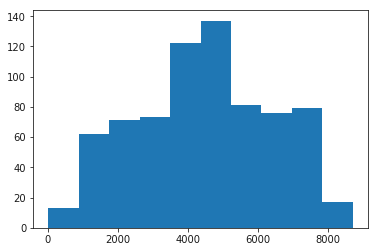

In [88]:
#histogram representing cnt
num_bins = 10
plt.hist (day['cnt'],num_bins)

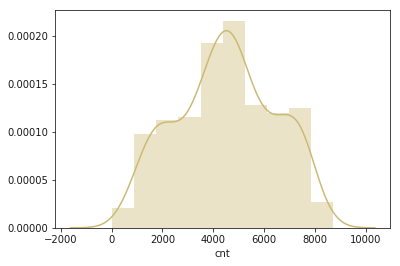

In [89]:
sns.set_color_codes()
sns.distplot(day['cnt'],num_bins,color='y')

In [90]:
season_dist= day.groupby('mnth').size()
season_dist

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64

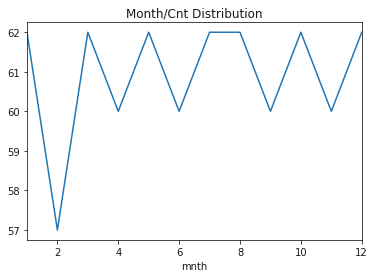

In [91]:
season_dist.plot(title='Month/Cnt Distribution')

In [92]:
# select numerical values
day_num = day.select_dtypes(include=['float64','int64'])
day_num.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc31cb29d0>,
      dtype=object)

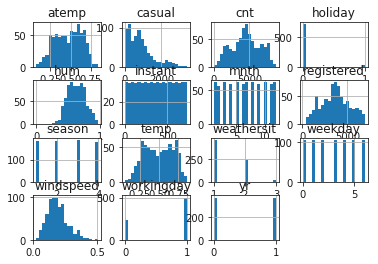

In [93]:
day_num.hist(bins=20)

In [94]:
#correlation analysis, 
day_corr= day_num.corr()['cnt'][:-1]

as shown in the correlation matrix, the variables that correlate the most are: temp, atemp, yr, season & mnth

In [59]:
day_corr

instant       0.628830
season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
casual        0.672804
registered    0.945517
Name: cnt, dtype: float64

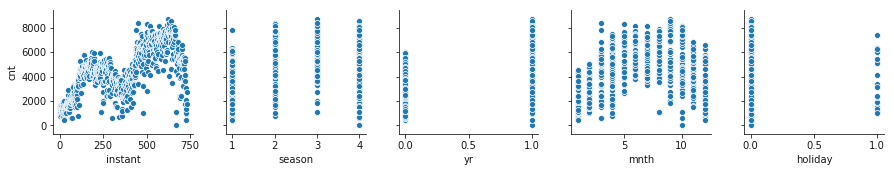

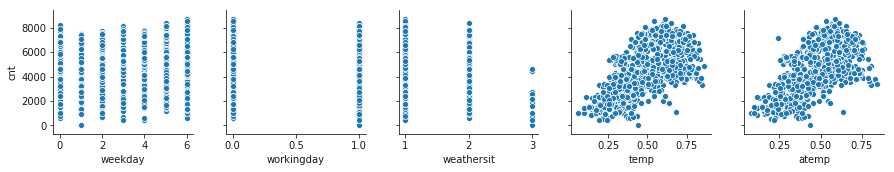

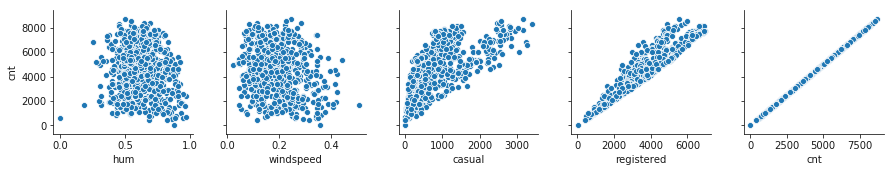

In [95]:
#correlation plot, of all attributes to the cnt
for i in range (0, len(day_num.columns),5):
    sns.pairplot(day_num, y_vars=['cnt'],x_vars=day_num.columns[i:i+5])

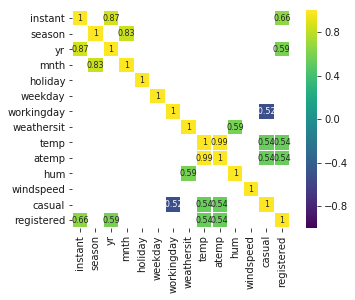

In [96]:
#plotting other attributes correlation on a heatmap
corr= day_num.drop('cnt',axis=1).corr()
sns.heatmap(corr[(corr>=0.5)|(corr<=-0.4)],
cmap='viridis',vmax=1.0, vmin=-1.0,linewidth=0.1, 
            annot=True, annot_kws={'size':8},square=True
           )

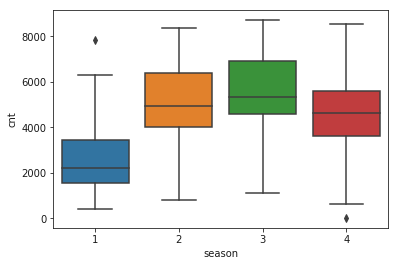

In [62]:
#box-plot, season-cnt
box1= sns.boxplot(x='season',y='cnt',data=day)

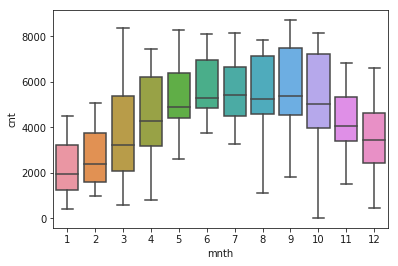

In [97]:
#box-plot,for the mnth and the cnt,  
box2= sns.boxplot(x='mnth',y='cnt',data=day)

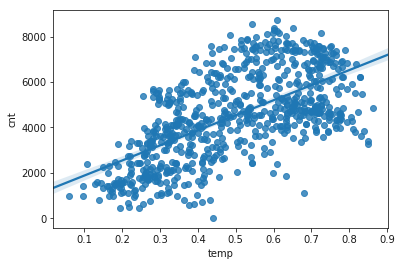

In [110]:
#regression plot 1 
sns.regplot(day_num['temp'],day_num['cnt'])

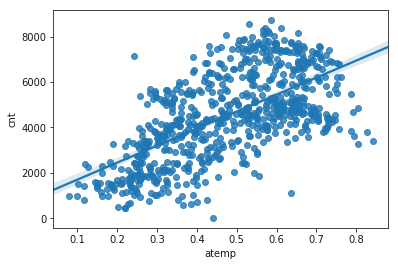

In [111]:
#regression plot 2
sns.regplot(day_num['atemp'],day_num['cnt'])

# Now we start by creating the model, in this case, we chose Multiple Linear Regression to predict the hourly utilization 'cnt' variable

In [100]:
#import necassary libraries, sklearn & numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

below, we drop attributes with low correlation to the 'cnt' to achieve better results

In [114]:
X= day.drop(['instant','dteday','cnt','weekday','holiday','workingday','casual','registered'],axis=1)
y= day['cnt']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)


In [116]:
lin_reg_mod = LinearRegression()

In [117]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [118]:
pred = lin_reg_mod.predict(X_test)

In [119]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

Accuracy scores are okay, however the rmse scores are not satisfying

In [128]:
print( "rmse" = test_set_rmse)
print(test_set_r2)

SyntaxError: invalid syntax (<ipython-input-128-de2926d303f7>, line 1)

In [78]:
import pandas as pd
day = pd.read_csv('day.csv')

# Calculate the M.A.D. (Mean Absolute Difference)

In [79]:
def mad(day):
    cnt=day['cnt']
    s=0
    c=0
    for i in cnt:
        c+=1
    for j in cnt:
        s+=j
    mean = float(s/c)  
    dvmean = abs(day['cnt']-mean)
    S = 0
    for i in dvmean:
        S+=i
    mad = float(S/c)
    return mad 
mad(day)


1581.7989056087551